# <center>대한민국 사교육비 분석 - 2016
#### 분석자: 박지훈
#### 분석 일시: 2017년 07월 03일
#### 자료 출처: MDIS(마이크로 데이터 통합 제공 서비스) / 교육부
#### 분석 목적: 사교육비에 영향을 주는 요소들을 회귀분석을 통해 알아보고 그에 맞는 정책수립을 지원하기 위해 분석을 실시

## 1. 라이브러리 불러오기
### pandas, numpy, statsmodels, matplotlib, re, ggplot

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\envs\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
import re

In [29]:
import ggplot

## 2. csv파일 불러오기

In [3]:
#raw_data = pd.read_csv("~/hosthome/edu_r.csv", encoding="cp949")
#raw_data = pd.read_csv("~/hosthome/raw_edu.csv", header=None)
raw_data = pd.read_csv("edu_r.csv", encoding="cp949")


In [4]:
raw_data.head()

,Unnamed: 0,지역구분,행정구역(시도),학교급구분,일반교과사교육목적구분(1순위),일반교과사교육목적구분(2순위),일반교과사교육시간,예체능사교육목적구분(1순위),예체능사교육목적구분(2순위),예체능사교육시간,...,미술,체육,취미·교양,예체능개인과외,예체능그룹과외,예체능학원수강,예체능방문수업,다.취업관련(고등학교의경우),가중치(weight),진학희망고등학교유형
0,1,1,11,1,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.496668,1.0
1,2,1,11,1,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.975383,7.0
2,3,1,11,1,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.668677,1.0
3,4,1,11,1,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.685585,3.0
4,5,1,11,1,NaN,NaN,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.228441,1.0


## 3. label파일 불러오기
라벨은 마이크로 데이터 통합서비스 홈페이지에서 따로 제공되는 파일이 없기때문에 웹페이지에 게시되어있는 라벨을 수집
### 3-1. 한글 인코딩

In [32]:
label = open("label_kor.txt", "r", encoding="cp949")
#label = label.read().decode("cp949", "ignore")
#pd.read_csv("label_kor.txt", "r", encoding="cp949")
#a = label.readlines()
#a

### 3-2. 정규표현식으로 label 수정-미완

In [5]:
pattern = re.compile("(코드|숫자)")
m = pattern.findall(label)
m

NameError: name 're' is not defined

## 4. 칼럼 설명

|번호|구분|칼럼명|설명|
|----|----|------|----|
|1|코드|지역 구분|서울, 광역시, 중소도시, 읍면읍		
|2|	코드|	행정구역(시도)|서울, 부산, 대구, 인천, 광주, 대전, 울산, 세종, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주		
|3|	코드|	학교급 구분|초등학교, 중학교, 일반고, 특성화고
|4|	코드|	일반교과 사교육 목적 구분(1순위)|보육, 학교수업 보충, 진학준비, 불안심리, 선행학습, 친구를 사귀기 위해서, 기타
|5|	코드|	일반교과 사교육 목적 구분(2순위)|보육, 학교수업 보충, 진학준비, 불안심리, 선행학습, 친구를 사귀기 위해서, 기타
|6|	숫자|	일반교과 사교육 시간|주당평균시간
|7|	코드|	예체능 사교육 목적 구분(1순위)|보육, 취미 교양 재능계발, 학교수업 보충, 진학준비, 친구를 사귀기 위해서, 기타
|8|	코드|	예체능 사교육 목적 구분(2순위)|보육, 취미 교양 재능계발, 학교수업 보충, 진학준비, 친구를 사귀기 위해서, 기타
|9|	숫자|	예체능 사교육 시간|주당평균시간
|10|숫자|	취업관련 사교육 시간|주당평균시간
|11|숫자|	사교육 참여시간(TOT)|주당평균시간, 일반교과 사교육시간 + 예체능 사교육 시간 + 취업관련 사교육 시간
|12|코드|	학생 성별|남학생, 여학생
|13|코드|	학생 성적 구분|상위(10%), 중상위(11~30%), 중위(31~60%), 중하위(61~80%), 하위(80~100%)
|14|코드|	부의 연령|20대, 30대, 40대, 50대, 60대 이상, 안계심
|15|코드|	부의 교육정도|안받았음, 초등학교(졸업, 재학, 중퇴, 휴학), 중학교(졸업, 재학, 중퇴, 휴학), 고등학교(졸업, 재학, 중퇴, 휴학)<br/>4년제미만 대학(졸업, 재학, 중퇴, 휴학), 4년제이상 대학(졸업, 재학, 중퇴, 휴학)<br/>대학원석사(졸업, 재학, 중퇴, 휴학), 대학원박사(졸업, 재학, 중퇴, 휴학)
|16|코드|	모의 연령|20대, 30대, 40대, 50대, 60대 이상, 안계심
|17|코드|	모의 교육정도|안받았음, 초등학교(졸업, 재학, 중퇴, 휴학), 중학교(졸업, 재학, 중퇴, 휴학), 고등학교(졸업, 재학, 중퇴, 휴학)<br/>4년제미만 대학(졸업, 재학, 중퇴, 휴학), 4년제이상 대학(졸업, 재학, 중퇴, 휴학)<br/>대학원석사(졸업, 재학, 중퇴, 휴학), 대학원박사(졸업, 재학, 중퇴, 휴학)
|18|코드|	부모의 경제활동|아버지, 어머니, 모두 참여함, 모두 참여하지 않음	
|19|코드|	가구소득|(월평균-세금공제전), 100만원 미만, 100~199만원, 200~299만원<br/>300~399만원, 400~499만원, 500~599만원, 600~699만원, 700만원 이상
|20|코드|	방과후 학교참여(유상+무상)|참여, 미참여
|21|숫자|	방과후 학교 참여시간|주당평균시간
|22|숫자|	방과후 학교|연간금액
|23|숫자|	초등 방과후 보육 프로그램|연간금액
|24|숫자|	특기적성 프로그램|연간금액
|25|숫자|	교과 프로그램|연간금액
|26|숫자|	EBS 교재비|연간금액
|27|숫자|	어학연수비|연간금액
|28|숫자|	국내연수|연간금액
|29|숫자|	해외연수|연간금액
|30|숫자|	사교육비|연간금액
|31|숫자|	가. 일반교과|연간금액
|32|숫자|	국 어|연간금액
|33|숫자|	영 어|연간금액
|34|숫자|	수 학|연간금액
|35|숫자|	사회, 과학|연간금액
|36|숫자|	제2외국어, 한문, 컴퓨터|연간금액
|37|숫자|	논 술|연간금액
|38|숫자|	일반교과 개인과외|연간금액
|39|숫자|	일반교과 그룹과외|연간금액
|40|숫자|	일반교과 학원수강|연간금액
|41|숫자|	일반교과 방문학습지|연간금액
|42|숫자|	일반교과 유료인터넷 및 통신강좌|연간금액
|43|숫자|	나. 예체능, 취미, 교양|연간금액
|44|숫자|	음 악|연간금액
|45|숫자|	미 술|연간금액
|46|숫자|	체 육|연간금액
|47|숫자|	취미·교양|연간금액
|48|숫자|	예체능 개인과외|연간금액
|49|숫자|	예체능 그룹과외|연간금액
|50|숫자|	예체능 학원수강|연간금액
|51|숫자|	예체능 방문수업|연간금액
|52|숫자|	다. 취업관련(고등학교의 경우)|연간금액
|53|숫자|	가중치(weight)|소수점 포함
|54|코드|	진학희망고등학교유형|일반고, 자율고, 특목고(과학고, 외고, 국제고), 특목고(예술고, 체육고), 특목고(마이스터고)<br/>특성화고, 대안학교, 해외유학

## 5. 칼럼 정리 및 NA값 제거

In [9]:
data_1 = raw_data.drop([u"Unnamed: 0", u"일반교과사교육목적구분(1순위)", u"일반교과사교육목적구분(2순위)", 
                        u"예체능사교육목적구분(1순위)", u"예체능사교육목적구분(2순위)",u"가중치(weight)", 
                        u"진학희망고등학교유형", u"다.취업관련(고등학교의경우)"], axis=1)
data_1 = data_1.dropna()
data_1.head()

,지역구분,행정구역(시도),학교급구분,일반교과사교육시간,예체능사교육시간,취업관련사교육시간,사교육참여시간(TOT),학생성별,학생성적구분,부의연령,...,일반교과유료인터넷및통신강좌,"나.예체능,취미,교양",음악,미술,체육,취미·교양,예체능개인과외,예체능그룹과외,예체능학원수강,예체능방문수업
0,1,11,1,0.0,0.0,0.0,0.0,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11,1,0.0,0.0,0.0,0.0,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,11,1,0.0,0.0,0.0,0.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,11,1,0.0,0.0,0.0,0.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,11,1,0.0,0.0,0.0,0.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. 데이터 탐색
### 6-1. 변수 별 기술통계

In [48]:
data_1.describe()

,지역구분,행정구역(시도),학교급구분,일반교과사교육시간,예체능사교육시간,취업관련사교육시간,사교육참여시간(TOT),학생성별,학생성적구분,부의연령,...,일반교과유료인터넷및통신강좌,"나.예체능,취미,교양",음악,미술,체육,취미·교양,예체능개인과외,예체능그룹과외,예체능학원수강,예체능방문수업
count,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,...,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000,75717.000000
mean,2.566557,27.432518,2.305665,3.931398,1.529454,0.059705,5.520557,1.474041,3.153730,3.133973,...,4.772631,58.419126,21.005210,11.365675,19.873036,6.175205,11.503253,3.430549,41.016979,2.468346
std,0.931214,8.642833,0.937616,5.230542,3.487941,0.876703,6.125523,0.499329,1.246923,0.553434,...,30.698375,143.454861,88.980523,71.670070,65.943328,49.249726,83.024458,30.477470,109.946999,20.565538
min,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.000000,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,3.000000,7.000000,1.000000,0.000000,10.000000,2.000000,4.000000,3.000000,...,0.000000,47.733669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,39.000000,4.000000,40.000000,63.666667,60.000000,63.666667,2.000000,5.000000,5.000000,...,1134.442606,3545.133145,3545.133145,1831.652125,2048.569964,1693.785836,3545.133145,1418.053258,1988.902877,1611.011331


### 상관관계(사교육비)

In [16]:
data_1_corr = data_1.corr()
data_1_corr = data_1_corr.loc[:, u"사교육비"]
data_1_corr = data_1_corr.drop(u"사교육비")
data_1_corr[np.abs(data_1_corr)>0.4]

일반교과사교육시간       0.700374
사교육참여시간(TOT)    0.705879
가.일반교과          0.915533
국어              0.505716
영어              0.761296
수학              0.757258
사회,과학           0.404597
일반교과개인과외        0.469506
일반교과학원수강        0.716793
Name: 사교육비, dtype: float64

### 지역구분(1: 서울, 2:광역시, 3:중소도시, 4:읍면지역)별 평균 값

In [38]:
group = data_1.iloc[:,(0, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13)]
pd.groupby(group, u"지역구분").mean()

,일반교과사교육시간,예체능사교육시간,취업관련사교육시간,사교육참여시간(TOT),학생성적구분,부의연령,부의교육정도,모의연령,모의교육정도,부모의경제활동
지역구분,,,,,,,,,,
1,5.696717,1.810053,0.062124,7.568894,3.145189,3.190833,47.488043,2.940596,44.469918,2.180679
2,3.977375,1.582097,0.061339,5.620811,3.154344,3.132959,43.637466,2.885637,41.096414,2.249384
3,3.732767,1.504931,0.059798,5.297496,3.159866,3.114398,42.538910,2.867349,40.279656,2.343777
4,2.831794,1.253476,0.054435,4.139706,3.146529,3.131137,39.403571,2.856241,37.944590,2.406111


위의 표를 보면 지역구분에 따라 평균값이 달라지는것을 알 수있다. 대표적으로 사교육참여시간의 경우 서울의 경우 주당 평균 7.5시간인데 반해 읍면도시의 경우 4.1시간임을 알 수 있다. 

In [41]:
group = data_1.iloc[:,(0, 14, 15, 16, 21, 22, 23, 24, 25)]
pd.groupby(group, u"지역구분").mean()

,가구소득,방과후학교참여(유상+무상),방과후학교참여시간,EBS교재비,어학연수비,국내연수,해외연수,사교육비
지역구분,,,,,,,,
1,5.592143,1.535206,1.949421,4.328952,9.303892,0.921269,8.382623,512.974358
2,4.982738,1.311598,4.068992,4.627564,7.332813,0.591691,6.741122,315.032865
3,4.882797,1.413400,3.334681,4.111378,4.556484,0.555706,4.000779,281.910084
4,4.575419,1.283054,3.915038,3.627566,6.164679,0.377385,5.787294,199.612653


방과후 학교 참여의 경우 읍면지역으로 갈수록 1에 가까운 값이 나옴으로써 더 많은 학생들이 참여함을 알 수 있다. 

In [4]:
data_1.columns

Index([u'지역구분', u'행정구역(시도)', u'학교급구분', u'일반교과사교육시간', u'예체능사교육시간', u'취업관련사교육시간',
       u'사교육참여시간(TOT)', u'학생성별', u'학생성적구분', u'부의연령', u'부의교육정도', u'모의연령',
       u'모의교육정도', u'부모의경제활동', u'가구소득', u'방과후학교참여(유상+무상)', u'방과후학교참여시간',
       u'방과후학교', u'초등방과후보육프로그램', u'특기적성프로그램', u'교과프로그램', u'EBS교재비', u'어학연수비',
       u'국내연수', u'해외연수', u'사교육비', u'가.일반교과', u'국어', u'영어', u'수학', u'사회,과학',
       u'제2외국어,한문,컴퓨터', u'논술', u'일반교과개인과외', u'일반교과그룹과외', u'일반교과학원수강',
       u'일반교과방문학습지', u'일반교과유료인터넷및통신강좌', u'나.예체능,취미,교양', u'음악', u'미술', u'체육',
       u'취미·교양', u'예체능개인과외', u'예체능그룹과외', u'예체능학원수강', u'예체능방문수업'],
      dtype='object')

### 6-2. 탐색적 시각화(EDA)

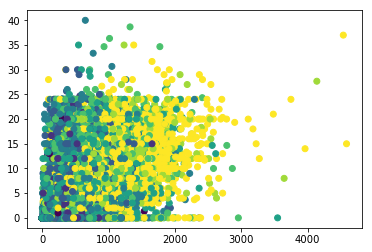

In [21]:
plt.scatter(data_1.loc[:, u"사교육비"], data_1.loc[:, u"일반교과사교육시간"], c=data_1.loc[:, u"가구소득"])
plt.show()

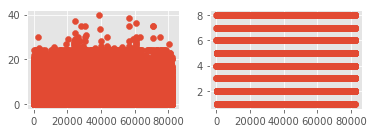

In [28]:
plt.style.use('ggplot')
plt.subplot(221)
plt.scatter(data_1.sort_values(by=u"일반교과사교육시간").index, data_1.loc[:, u"일반교과사교육시간"])
plt.subplot(222)
plt.scatter(data_1.index, data_1.loc[:, u"가구소득"])
plt.show()

In [ ]:
plt.

In [26]:
data_1.sort_values(by=u"일반교과사교육시간").index

Int64Index([    0, 28554, 28555, 28556, 28557, 28558, 28559, 28560, 28561,
            28562,
            ...
            10424, 42193, 44823,  4683, 42312,  5156,  8228,  9090,  5157,
            46023],
           dtype='int64', length=75717)

In [27]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [94]:
raw_data.columns

,지역구분,행정구역(시도),학교급구분,일반교과사교육시간,예체능사교육시간,취업관련사교육시간,사교육참여시간(TOT),학생성별,학생성적구분,부의연령,...,미술,체육,취미·교양,예체능개인과외,예체능그룹과외,예체능학원수강,예체능방문수업,다.취업관련(고등학교의경우),가중치(weight),진학희망고등학교유형
0,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,2,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,144.496668,1.0
1,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,2,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,88.975383,7.0
2,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,174.668677,1.0
3,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,94.685585,3.0
4,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,161.228441,1.0
5,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,160.865149,1.0
6,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,171.367740,2.0
7,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,174.524028,1.0
8,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,155.831075,3.0
9,1,11,1,0.000000,0.000000,0.0,0.000000,1,1,3,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,185.175620,1.0


Index([u'지역구분', u'행정구역(시도)', u'학교급구분', u'일반교과사교육시간', u'예체능사교육시간', u'취업관련사교육시간',
       u'사교육참여시간(TOT)', u'학생성별', u'학생성적구분', u'부의연령', u'부의교육정도', u'모의연령',
       u'모의교육정도', u'부모의경제활동', u'가구소득', u'방과후학교참여(유상+무상)', u'방과후학교참여시간',
       u'방과후학교', u'초등방과후보육프로그램', u'특기적성프로그램', u'교과프로그램', u'EBS교재비', u'어학연수비',
       u'국내연수', u'해외연수', u'사교육비', u'가.일반교과', u'국어', u'영어', u'수학', u'사회,과학',
       u'제2외국어,한문,컴퓨터', u'논술', u'일반교과개인과외', u'일반교과그룹과외', u'일반교과학원수강',
       u'일반교과방문학습지', u'일반교과유료인터넷및통신강좌', u'나.예체능,취미,교양', u'음악', u'미술', u'체육',
       u'취미·교양', u'예체능개인과외', u'예체능그룹과외', u'예체능학원수강', u'예체능방문수업',
       u'다.취업관련(고등학교의경우)', u'가중치(weight)', u'진학희망고등학교유형'],
      dtype='object')

## 7. 회귀분석
### 7.1. 사교육비에 대한 지역별, 사교육참여시간 회귀분석(OLS)
모델: 사교육비 ~ 사교육참여시간 + 지역구분

In [41]:
OLS = sm.OLS.from_formula("data_1.iloc[:,25] ~ data_1.iloc[:,6] + C(data_1.iloc[:,0])-1", data=data_1).fit()

In [46]:
OLS.summary(yname = "사교육비", xname = ("사교육참여시간", "지역구분_서울", "지역구분_대도시", "지역구분_중소도시", "지역구분_읍면지역"))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   사교육비   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 2.032e+04
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        10:55:34   Log-Likelihood:            -5.2626e+05
No. Observations:               75717   AIC:                         1.053e+06
Df Residuals:                   75712   BIC:                         1.053e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
사교육참여시간      205.6620      2.714     75.765      0.000       200.342   210.982
지역구분_서울       86.8166      1.818     47.759      0.000        83.254    90.379
지역구분_대도시      66.8211      1.723     38.783      0.000        63.444    70.198
지역구분_중소도시     31.5323      2.302     13.696      0.000        27.020    36.045
지역구분_읍면지역     40.6020      0.152    267.647      0.000        40.305    40.899
==============================================================================
Omnibus:                    29666.529   Durbin-Watson:                   1.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           292978.168
Skew:                           1.610   Prob(JB):                         0.00
Kurtosis:                      12.083   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위의 회귀분석 결과를 보면 R squared 값이 0.518로 나온것을 알 수 있다. 이는 사교육비에 강한 선형관계가 있을것이라고 추정되는 사교육참여시간의 영향으로 보인다. 

### 7.2. 중요변수 중요도 비교

In [47]:
sm.stats.anova_lm(OLS)

,df,sum_sq,mean_sq,F,PR(>F)
"C(data_1.iloc[:, 0])",3.0,6.147271e+08,2.049090e+08,3214.008296,0.0
"data_1.iloc[:, 6]",1.0,4.567093e+09,4.567093e+09,71635.073915,0.0
Residual,75712.0,4.827017e+09,6.375498e+04,NaN,NaN


## 8. 결론

In [36]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import KFold

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)
model = LinearRegression()
cv = KFold(1000, 10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([ 0.95636425,  0.94908323,  0.93880683,  0.92906829,  0.93119768,
        0.95362566,  0.93217768,  0.94308775,  0.94579305,  0.94749884])

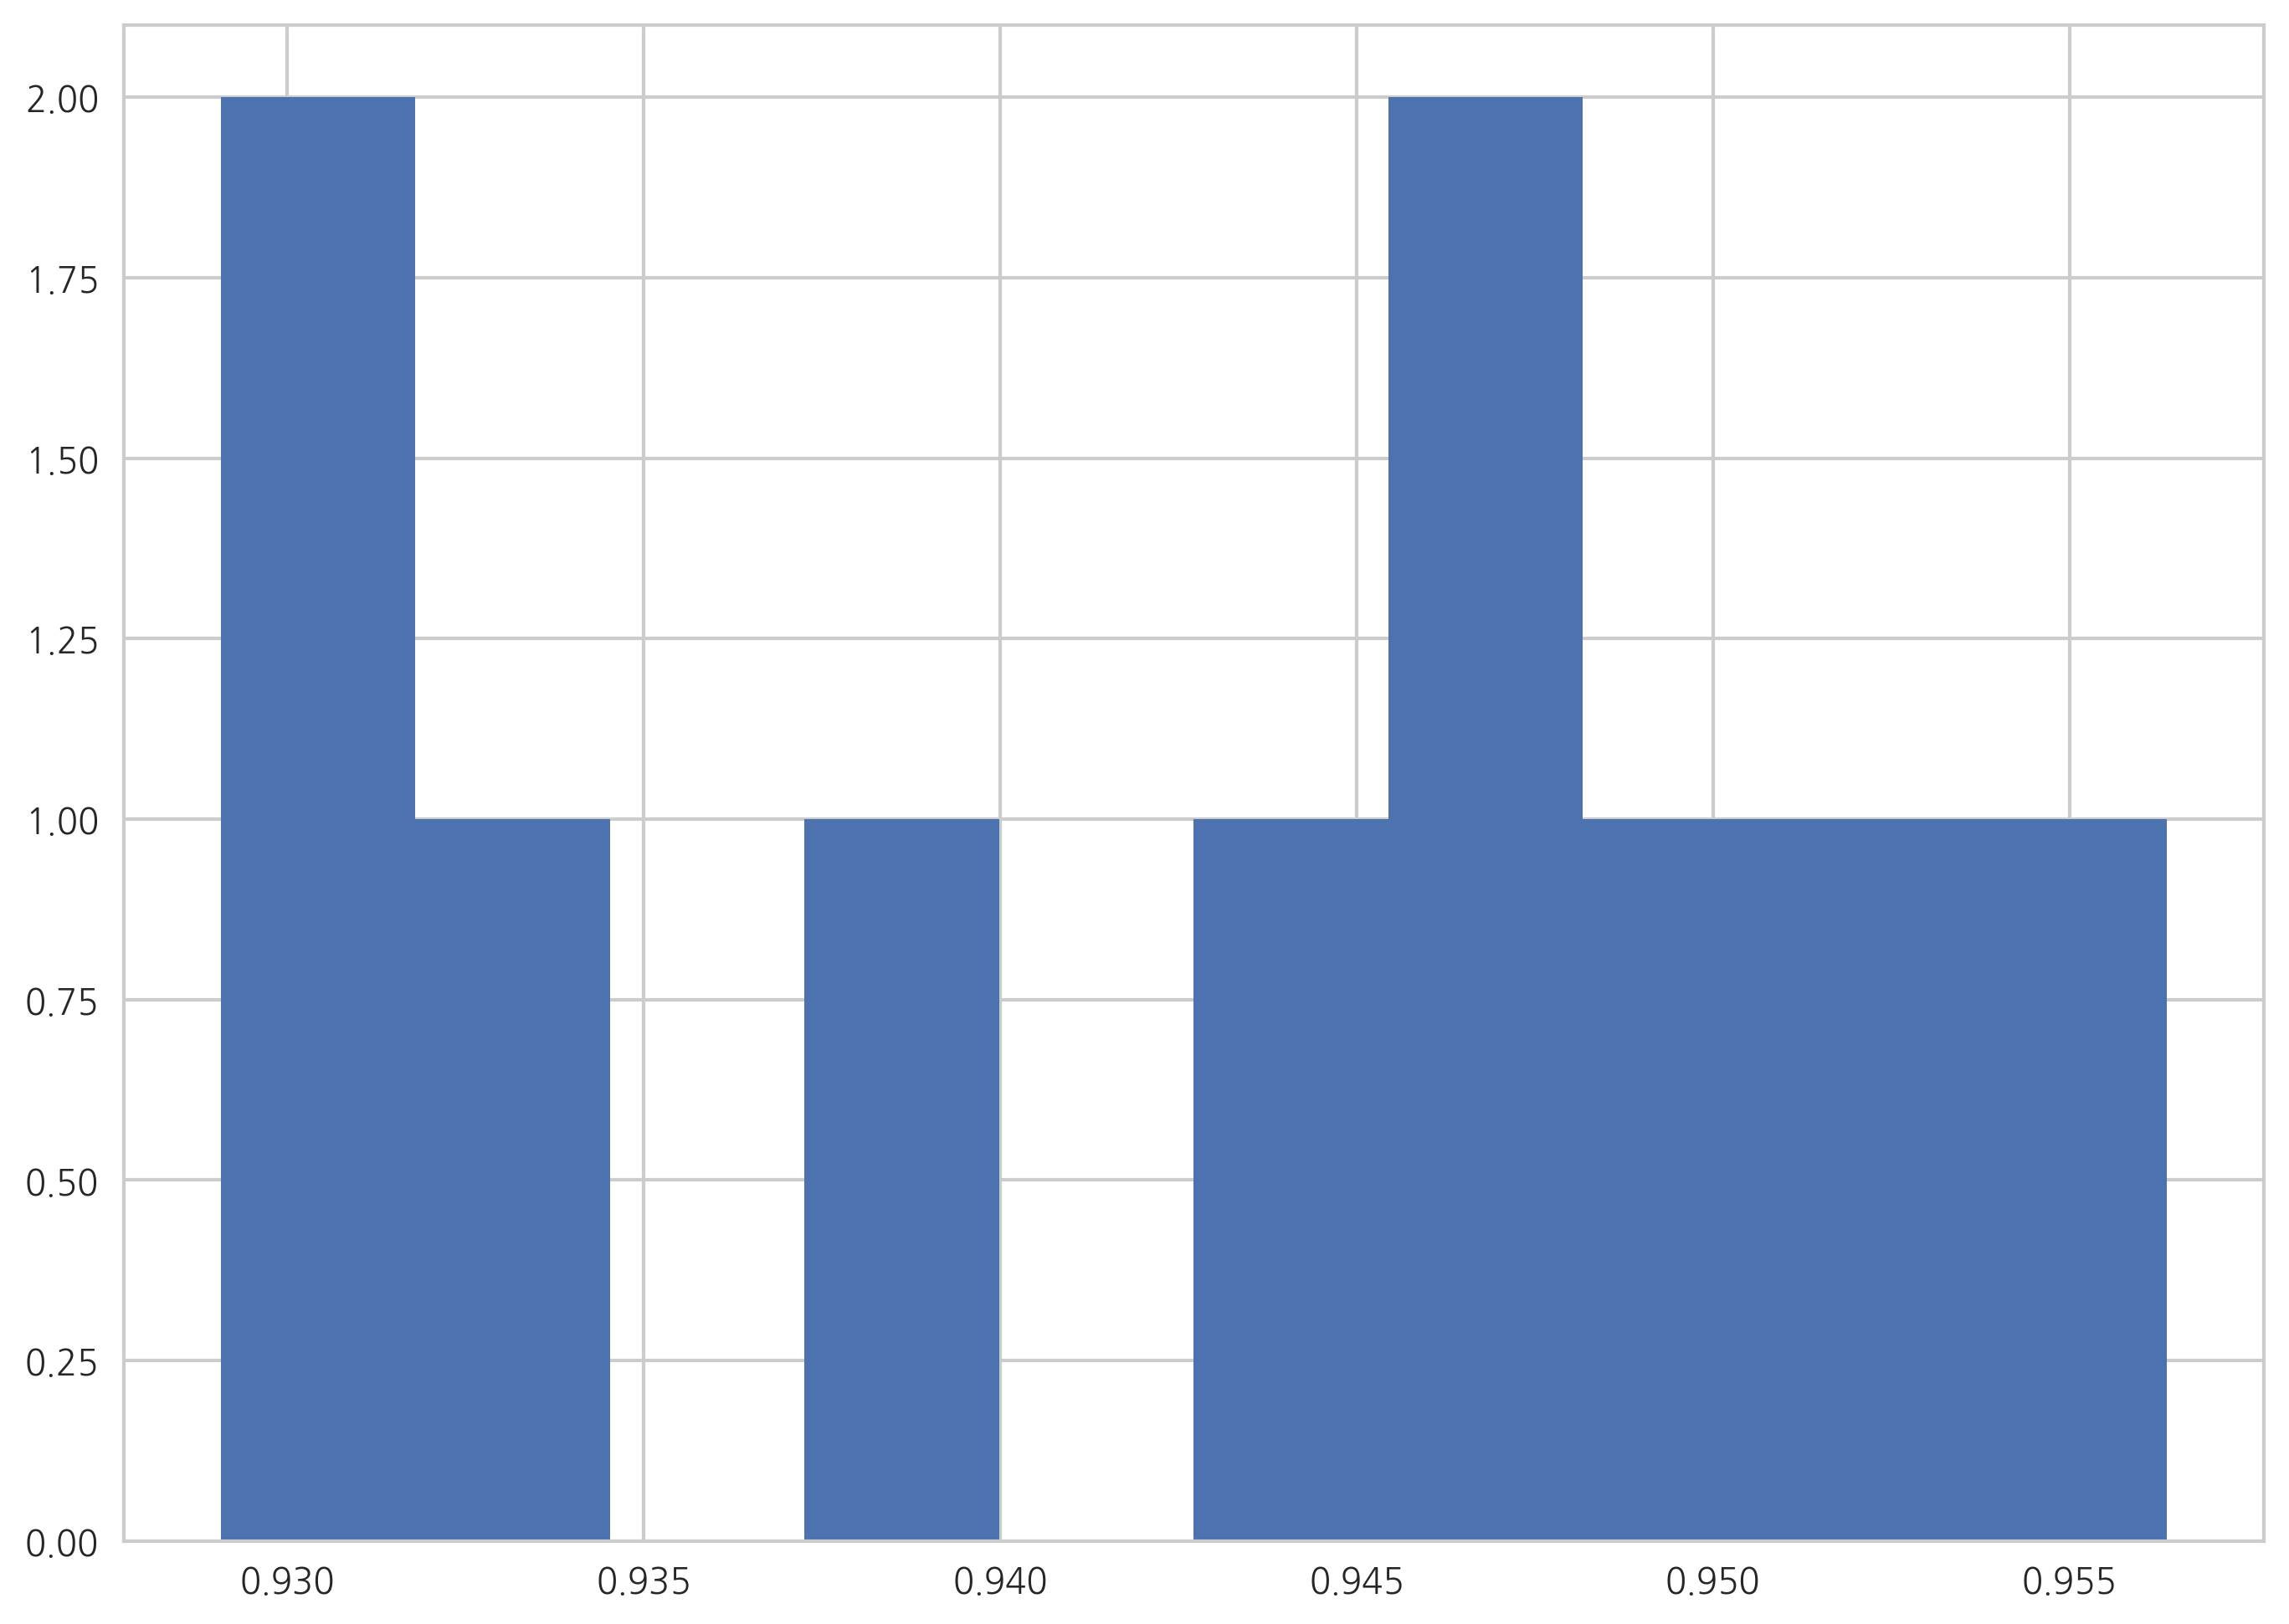

In [45]:
np.mean(scores)
plt.hist(scores)

plt.show()

In [42]:
np.mean(scores)

0.94267032698237807

In [43]:
np.var(scores)

8.2356752603239571e-05